# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> [Aerolineas Frontera] - Estudio de la Satisfaccion de los Clientes
<a id='measures'></a>

### i. Cargando las Librerias de Python:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) #background for the graphs
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #To supress warnings
from scipy import stats
import copy
class style:
   BOLD = '\033[1m'
   END = '\033[0m'
import warnings
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

### ii. Importando los datasets:

In [5]:
#Permitir acceso a Google Drive para importar archivos
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Cargando los archivos en un pandas dataframe
survey = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_survey.csv")

In [ ]:
survey.info() #Verificando informacion de las variables

In [ ]:
Survey = survey.rename(columns={'Departure.Arrival.time_convenient': 'DepartureArrivaltime_convenient'}, inplace = False)
#Change column name Departure.Arrival.time_convenient to DepartureArrivaltime_convenient to avoid syntax issues

In [ ]:
# Cargando los archivos en un pandas dataframe
flight = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_flight.csv")

In [ ]:
flight.info() #Verificando informacion de las variables

In [ ]:
Flight = flight.rename(columns={'CustomerID': 'CustomerId'}, inplace = False) #Cambio de nombre de variable CustomerID

In [ ]:
data = pd.merge(Survey, Flight, how='outer', on='CustomerId') #Base de datos Consolidada

###iii. Verificando la dimension de la data:

In [ ]:
data.shape #Para revisar el numero de observaciones y atributos disponibles en los datos.

###iv. Revision del tipo de variables:

In [ ]:
data.info()

###v. Revision de las primeras 5 filas:

In [ ]:
data.head()

###vi. Revision de las 5 ultimas filas:

In [ ]:
data.tail()

##vii. Creando una copia del dataset:

In [ ]:
df=data.copy()

##viii. Revision de la Estructura de la data y Datos Faltantes:

In [ ]:
df.info()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

##ix. Conversion de variables categoricas a numericas:

In [ ]:
#Este proceso permitira simplificar el analisis y el aprendizaje automatico

In [ ]:
replaceStruct = {
                'TypeTravel': {'Personal Travel': 1, 'Business travel': 2},
                'DepartureArrivaltime_convenient': {'extremely poor': 0, 'poor': 1, 'need improvement': 2, 'acceptable': 3, 'good': 4, 'excellent': 5},
                'Food_drink': {'extremely poor': 0, 'poor': 1, 'need improvement': 2, 'acceptable': 3, 'good': 4, 'excellent': 5},
                'Onboard_service':{'extremely poor': 0, 'poor': 1, 'need improvement': 2, 'acceptable': 3, 'good': 4, 'excellent': 5},
                'Seat_comfort': {'extremely poor': 0, 'poor': 1, 'need improvement': 2, 'acceptable': 3, 'good': 4, 'excellent': 5},
                'Inflightwifi_service': {'extremely poor': 0, 'poor': 1, 'need improvement': 2, 'acceptable': 3, 'good': 4, 'excellent': 5},
                'Cleanliness': {'extremely poor': 0, 'poor': 1, 'need improvement': 2, 'acceptable': 3, 'good': 4, 'excellent': 5},
                'Inflight_entertainment': {'extremely poor': 0, 'poor': 1, 'need improvement': 2, 'acceptable': 3, 'good': 4, 'excellent': 5},
                'Leg_room_service': {'extremely poor': 0, 'poor': 1, 'need improvement': 2, 'acceptable': 3, 'good': 4, 'excellent': 5},
                'Online_boarding': {'extremely poor': 0, 'poor': 1, 'need improvement': 2, 'acceptable': 3, 'good': 4, 'excellent': 5},
                'Online_support': {'extremely poor': 0, 'poor': 1, 'need improvement': 2, 'acceptable': 3, 'good': 4, 'excellent': 5},
                'Baggage_handling': {'extremely poor': 0, 'poor': 1, 'need improvement': 2, 'acceptable': 3, 'good': 4, 'excellent': 5},
                'Gate_location': {'very inconvinient': 0, 'Inconvinient': 1, 'need improvement': 2, 'manageable': 3, 'Convinient': 4, 'very convinient': 5},
                'Ease_of_Onlinebooking': {'extremely poor': 0, 'poor': 1, 'need improvement': 2, 'acceptable': 3, 'good': 4, 'excellent': 5},
                'Checkin_service': {'extremely poor': 0, 'poor': 1, 'need improvement': 2, 'acceptable': 3, 'good': 4, 'excellent': 5},
                'Satisfaction': {'satisfied': 1, 'neutral or dissatisfied': 0},
                'Gender': {'Male': 1, 'Female': 2},
                'Class': {'Eco': 1, 'Eco Plus': 2, 'Business': 3},
                'CustomerType': {'Loyal Customer': 1, 'disloyal Customer': 0},
}
oneHotCols= ['TypeTravel', 'Departure.Arrival.time_convenient', 'Food_drink', 'Onboard_service', 'Seat_comfort', 'Inflightwifi_service', 'Cleanliness', 'Inflight_entertainment', 'Leg_room_service', 'Online_boarding', 'Online_support', 'Baggage_handling', 'Gate_location', 'Ease_of_Onlinebooking', 'Checkin_service', 'Satisfaction', 'Gender', 'Class', 'CustomerType']

In [ ]:
df = df.replace(replaceStruct)
df.head(10)

##x. Tratamiento de Datos Faltantes:

Primero, se identificaron todas las columnas numéricas del conjunto de datos. Luego, se aplicó una función que reemplaza los valores faltantes con la mediana correspondiente, ya que la mediana no es sensible a los valores outliers. Esta función se aplicó a todas las columnas numéricas de forma simultánea. Después de imputar los datos faltantes, se revisó el conjunto de datos para asegurar que ya no quedaran valores faltantes.

In [ ]:
# Definir la medida de tendencia central a utilizar y justificar
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

In [ ]:
# Validando el tratamiento
df.isnull().sum().sort_values(ascending=False)

##xi. Eliminacion de Filas/Variables Innecesarias:

In [ ]:
#Realice los ajustes necesarios

In [ ]:
# Elimina Filas
#df.replace({'PreferredLoginDevice':np.nan},inplace=True)
#df=df.dropna(axis=0, how='any', subset=['PreferredLoginDevice'])

In [ ]:
# Elimina Columnas
#df.replace({'PreferredLoginDevice':np.nan},inplace=True)
#df=df.dropna(axis=1, how='any', subset=['PreferredLoginDevice'])

In [ ]:
df.head() #Verificando las 5 primeras filas del dataset df

##xii. Revision de Valores Unicos:

In [ ]:
df.nunique().sort_values(ascending=False)

In [ ]:
## Nota Importante: Comentar debidamente cada observacion

#2. Analisis Exploratorio de los Datos

i. Revision de estadisticas principales (Resumen de los 5 numeros)

In [ ]:
df.describe().T # Provee detalles de las estadisticas principales de las variables cuantitativas

In [ ]:
def quant_var_stats(x):
    """ Customized formula to calculate Descriptive Statistics for Quantitative Variables
    x: Variable Name from data (It must be written within quotes)
    var_list: List including all variables
    """
    # a.Define the type of variable using the conditional if statement below
    var_list = df.columns
    if x in var_list:
        if df[x].dtype == 'object':
            print ('\033[1m' + 'Qualitative (Categorical) Variable' + '\033[0m')
        elif df[x].dtype == 'int64':
            print ('\033[1m' + 'Discrete Quantitative Variable' + '\033[0m')
        elif df[x].dtype == 'float64':
            print ('\033[1m' + 'Continuous Quantitative Variable' + '\033[0m')

    # b.Calculating Mean, Median, and Mode to Analyze Central Tendency
    mean=df[x].mean()
    median=df[x].median()
    mode=df[x].mode()
    print ('\033[1m' + '\nMeasures of Central Tendency' + '\033[0m')
    print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode)

    # c. Calculating Measures of Location: Max, Min, First Quartile, Third Quartile
    max=df[x].max()
    min=df[x].min()
    First_quartile=df[x].quantile(0.25)
    Third_quartile=df[x].quantile(0.75)
    IQR=Third_quartile-First_quartile
    print ('\033[1m' + '\nMeasures of Location' + '\033[0m')
    print('Min: ',min,'\nMax: ',max,'\nLower Whisker:',First_quartile-1.5*IQR,'\n1st Quartile: ',First_quartile,'\n3rd Quartile: ',Third_quartile,'\nUpper Whisker:',Third_quartile+1.5*IQR)

    # d. Calculating measures of dispersion
    STD=df[x].std()
    print ('\033[1m' + '\nMeasures of Variability' + '\033[0m')
    print('Range: ',max-min,'\nIQR: ',IQR,'\nSTD: ',STD)

In [ ]:
# La funcion a continuacion imprimira un boxplot e histograma de frecuencias para toda variable cuantitativa del modelo
# Esta funcion toma una columna numerica como input y retorna un boxplot e histograma para la variable en estudio

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot e histograma combinado
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='skyblue', orient="h") # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, ax=ax_hist2, bins=bins, rug=True, palette="BuGn_r") if bins else sns.distplot(feature, kde=False, ax=ax_hist2, norm_hist=False) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [ ]:
def quant_var_graphs(x):
    """ Customized formula to graph a Histogram, Kernell Density Estimation & Cumulative Distribution
    x: Variable Name from data (It must be written within quotes)
    """
    # Create figure
    fig = plt.figure(figsize=(20, 6))

    # Create subplot axes
    ax1 = fig.add_subplot(1, 3, 1)  # 1x3 grid, position 1
    ax2 = fig.add_subplot(1, 3, 2)  # 1x3 grid, position 1
    ax3 = fig.add_subplot(1, 3, 3)  # 1x3 grid, position 1

    # Set first axis y-label
    ax1.set_ylabel('count')

    # Set second, third axes y-labels
    for axis in (ax2, ax3):
        axis.set_ylabel('frequency')

    # Set all axes x-labels
    for axis in (ax1, ax2, ax3):
        axis.set_xlabel('df')

    # Set axis titles
    ax1.set_title('Histogram')
    ax2.set_title('Kernell Density Distribution')
    ax3.set_title('Cumulative Distribution')

    # Plot histogram, KDE and all histogram/KDE/rug on three axes
    sns.distplot(df[x], kde=False, ax=ax1)
    sns.distplot(df[x], hist=False, ax=ax2)
    sns.distplot(df [x], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

In [ ]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data)

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage

    plt.show() # show the plot

In [ ]:
quant_var_stats('Age')

In [ ]:
histogram_boxplot(df['Age'])

In [ ]:
quant_var_graphs('Age')

• Age: Esta variable continua representa la edad de los clientes. La media fue de 39.45 años, con una desviación estándar de 15.13 años. El rango varió entre 7 y 85 años, con una mediana de 40 años.

In [ ]:
perc_on_bar(data['Satisfaction'])

•	Satisfaction: Variable categórica binaria que indica si un cliente está satisfecho (1) o no satisfecho (0). La media fue de 0.547, lo que significa que un poco más de la mitad de los clientes expresaron satisfacción. La distribución fue equilibrada, con un 50% de los valores igual o inferior a 1.

In [ ]:
perc_on_bar(data['Seat_comfort'])

• Seat_comfort: Esta variable mide la comodidad del asiento en una escala de 0 a 5. La media fue de 2.84, con una desviación estándar de 1.39. La mayor parte de los valores se concentraron entre 2 y 4, lo que indica una percepción de comodidad moderada.

In [ ]:
perc_on_bar(data['Online_support'])

•	Online_support: Esta variable evalúa el soporte en línea en una escala de 0 a 5. La media fue de 3.52, con una desviación estándar de 1.31. La mediana fue de 4, lo que sugiere que la mayoría de los clientes encontró el soporte en línea satisfactorio.

In [ ]:
perc_on_bar(data['Ease_of_Onlinebooking'])

•	Ease_of_Onlinebooking: Esta variable mide la facilidad de reserva en línea en una escala de 0 a 5. La media fue de 3.48, con una desviación estándar de 1.30. La mediana fue de 4, indicando que la mayoría consideró el proceso de reserva en línea fácil o muy fácil.

In [ ]:
perc_on_bar(data['Onboard_service'])

•	Onboard_service: Esta variable valora el servicio a bordo en una escala de 0 a 5. La media fue de 3.51, con una desviación estándar de 1.23. La mediana fue de 4, lo que refleja una valoración generalmente positiva.

In [ ]:
perc_on_bar(data['Leg_room_service'])

•	Leg_room_service: Esta variable mide la satisfacción con el espacio para las piernas en una escala de 0 a 5. La media fue de 3.49, con una desviación estándar de 1.29. La mediana fue de 4, sugiriendo que la mayoría de los clientes estaban satisfechos con el espacio para las piernas.

In [ ]:
perc_on_bar(data['Baggage_handling'])

•	Baggage_handling: Esta variable evalúa la gestión del equipaje en una escala de 1 a 5. La media fue de 3.70, con una desviación estándar de 1.15. La mediana fue de 4, indicando una alta satisfacción con este servicio.

In [ ]:
perc_on_bar(data['Checkin_service'])

•	Checkin_service: Esta variable mide la satisfacción con el servicio de facturación en una escala de 0 a 5. La media fue de 3.34, con una desviación estándar de 1.26. La mediana fue de 3, lo que indica que la percepción fue neutra.

In [ ]:
perc_on_bar(data['Cleanliness'])

•	Cleanliness: Esta variable valora la limpieza en una escala de 0 a 5. La media fue de 3.71, con una desviación estándar de 1.15. La mediana fue de 4, lo que sugiere que la mayoría de los clientes consideró que la limpieza era buena.

In [ ]:
perc_on_bar(data['Online_boarding'])

•	Online_boarding: Esta variable evalúa el proceso de embarque en línea en una escala de 0 a 5. La media fue de 3.35, con una desviación estándar de 1.30. La mediana fue de 4, indicando que la mayoría de los clientes consideró el proceso eficiente.

In [ ]:
perc_on_bar(data['DepartureArrivaltime_convenient'])

•	DepartureArrivaltime_convenient: Esta variable evalúa la conveniencia del horario de salida y llegada, también en una escala de 0 a 5. La media fue de 2.99, con una desviación estándar de 1.45. La mediana fue de 3, lo que sugiere una percepción equilibrada entre conveniencia e inconveniencia.

In [ ]:
perc_on_bar(data['Food_drink'])

•	Food_drink: Esta variable mide la satisfacción con la comida y bebida en una escala de 0 a 5. La media fue de 2.86, con una desviación estándar de 1.38. La mediana fue de 3, indicando que la mitad de los clientes calificó este servicio como aceptable o mejor.

In [ ]:
perc_on_bar(data['Gate_location'])

•	Gate_location: Esta variable valora la ubicación de la puerta de embarque en una escala de 0 a 5. La media fue de 2.99, con una desviación estándar de 1.31. La mediana fue de 3, lo que indica que la percepción fue en su mayoría neutra.

In [ ]:
perc_on_bar(data['Inflightwifi_service'])

•	Inflightwifi_service: Esta variable evalúa el servicio de Wi-Fi a bordo en una escala de 0 a 5. La media fue de 3.25, con una desviación estándar de 1.32. La mediana fue de 3, sugiriendo una ligera inclinación hacia una percepción positiva.

In [ ]:
perc_on_bar(data['Inflight_entertainment'])

•	Inflight_entertainment: Esta variable mide la calidad del entretenimiento a bordo en una escala de 0 a 5. La media fue de 3.38, con una desviación estándar de 1.34. La mediana fue de 4, lo que indica que la mayoría de los clientes valoró positivamente este servicio.

In [ ]:
perc_on_bar(data['Gender'])

•	Gender: Esta variable binaria asigna un valor de 1 o 2 según el género del cliente. La media fue de 1.51, con una desviación estándar de 0.50. Esto indica una distribución aproximadamente equitativa entre ambos géneros.

In [ ]:
perc_on_bar(data['CustomerType'])

•	CustomerType: Esta variable binaria diferencia entre clientes leales y no leales. La media fue de 0.84, lo que indica que una mayoría considerable de los clientes fueron leales.

In [ ]:
perc_on_bar(data['TypeTravel'])

In [ ]:
•	TypeTravel: Esta variable categórica mide el tipo de viaje con valores de 1 o 2. La media fue de 1.72, lo que indica que la mayoría de los clientes realizaban viajes personales.

In [ ]:
perc_on_bar(data['Class'])

•	Class: Esta variable categórica mide la clase de viaje en una escala de 1 a 3. La media fue de 2.03, con una desviación estándar de 0.96. La mediana fue de 2, lo que sugiere que la mayoría de los clientes viajaron en clase económica.

In [ ]:
perc_on_bar(data['Flight_Distance'])

•	Flight_Distance: Esta variable continua mide la distancia de vuelo en millas. La media fue de 1981.63 millas, con una desviación estándar de 1026.78 millas. Las distancias se encuentran entre 50 y 6950 millas, con una mediana de 1927 millas.

In [ ]:
perc_on_bar(data['DepartureDelayin_Mins'])

•	DepartureDelayin_Mins: Esta variable continua mide los minutos de retraso en la salida. La media fue de 14.69 minutos, con una desviación estándar de 38.67 minutos. La mayoría de los vuelos no presentaron retrasos significativos.

In [ ]:
perc_on_bar(data['•	ArrivalDelayin_Mins'])

•	ArrivalDelayin_Mins: Similar a la variable anterior, esta mide el retraso en la llegada. La media fue de 15.01 minutos, con una desviación estándar de 38.99 minutos. Los retrasos fueron generalmente cortos, con la mayoría de los vuelos sin retraso o con retrasos mínimos.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Univariate Analysis - Summary of Quantitative Variables (Histograms)

In [ ]:
# Check for correlation among quantitative variables
correlation = df.corr() # creating a 2-D Matrix with correlation plots
correlation

In [ ]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(data[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)


plt.show()

In [ ]:
# Heatmap for Correlation
fig,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.1f',cmap="coolwarm") # the color intensity is based on
plt.show()

In [ ]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x,flag=True):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Satisfaction'],margins=True)
    if flag==True:
        print(tab1)
        print('-'*120)
    tab = pd.crosstab(x,df['Satisfaction'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

In [ ]:
stacked_plot(df.Inflight_entertainment)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">High-Correlated variables review

Primero se analizó la **variable target: Satisfaction,** que en base al mapa de correlación, se tienen tres variables que están mayormente correlacionadas a esta: Inflight_entertainment, Online_support, Ease_of_Onlinebooking.

Se tiene la variable **Inflight_entertainment** con un valor de correlación positiva de 0.5, lo que indica que a medida que el entretenimiento a bordo mejora, la **satisfacción** del cliente **aumenta**.

Asimismo, tenemos a las variables Online_Support y Ease_of_Onlinebooking con un factor de correlación positivo de 0.4 con la variable target, lo que implica que el nivel de satisfacción está relacionado al servicio online que la aerolínea pueda brindar, por lo que a un mejor servicio online de soporte y facilidad de hacer una reserva en línea, la satisfacción del cliente aumentará.

De igual manera estas variables están fuertemente relacionadas con la variables Online_boarding con un valor de 0.7 de factor de correlación, y ello tiene que ver debido a que son variables que engloban el servicio online brindado.

Además se tiene la variable **Inflightwifi_service** que tiene una correlación positiva con las variables ** Ease_of_onlinebooking, Online_support y OnlineBoarding** con un valor de 0.6 de correlación por lo que sugiere que los clientes que valoran los servicios y soporte online, valoran un buen servicio de Wi-Fi a bordo.

Por otro lado, se tiene a las variables **Seat_comfort** y **Food_drink** que están fuertemente relacionadas con un valor de 0.7, que implica que aquellos clientes que tienen una percepción de tener asientos más cómodos disfrutan los alimentos brindados durante el vuelo.

También se observa que las variables Baggage_handling y Cleanliness están correlacionadas positivamente con un valor de 0.6, por lo que se presupone que los clientes que encuentran una buena gestión en el manejo de equipaje tienden encontrar un ambiente más limpio.

Asimismo, se puede resaltar que las variables Age y Flight_Distance presentan una correlación negativa de 0.3, ello podría sugerir que los pasajeros de mayor edad prefieren vuelos más cortos y los pasajeros más jóvenes pueden soportar distancias más largas.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Tratamiento de Valores Extremos

Primero, se detectaron los valores extremos se generaron boxplots para todas las columnas numéricas de la data. Los boxplots permiten identificar visualmente los valores que se encuentran fuera del rango intercuartil (IQR). Se aplico whis=3 en los boxplots para incluir los valores extremos lejanos. Luego, se realizó el Tratamiento de valores atípicos para variables cuantitativas, se utilizó el método de recorte basado en el rango intercuartil (IQR). Este método ayuda a minimizar el impacto de los outliers en el análisis. Después de aplicar el tratamiento a los valores extremos, se generaron nuevamente los boxplots para verificar la efectividad del procedimiento.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df.select_dtypes(include=np.number)

# Calculate the number of rows and columns for subplots
num_cols = len(numeric_columns.columns)
num_rows = (num_cols + 3) // 4  # Adjust the number of rows as needed

# Set up the figure size and the number of subplots
plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure height based on number of rows

# Iterate over numeric columns and create a boxplot for each
for i, variable in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, 4, i + 1)  # Use calculated number of rows
    plt.boxplot(df[variable].dropna(), whis=3)  # Drop NaN values and set whis for far outliers
    plt.title(variable)
    plt.xlabel('Values')
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
### Outlier Treatment for Quantitative Variables

def treat_outliers(df,col):
    '''
    treats outliers in a variable
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical variables
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)

    return df



In [ ]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

# items to be removed
unwanted= {'CustomerId', 'Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink', 'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Class'} # keeping these columns as it is (no influcence of outliers in this numerical variable)

numerical_col = [ele for ele in numerical_col if ele not in unwanted]
df = treat_outliers_all(df,numerical_col)

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number)

# Calculate the number of rows needed for subplots
num_cols = len(numeric_columns.columns)
num_rows = (num_cols + 3) // 4

plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure height based on number of rows

for i, variable in enumerate(numeric_columns):
                     plt.subplot(num_rows, 4, i+1) # Increased number of rows to accommodate all plots
                     plt.boxplot(df[variable],whis=3) # Far Outliers
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# **Enfoque Analítico**

## **Calidad de los Insights**

### **•Satisfacción del cliente**
Existe una mayoría de pasajeros que expresaron una satisfacción positiva (54.7%), sin embargo, hay servicios a bodo que afectan la satisfacción y podrían mejorarse, tales como la comodidad del asiento, conveniencia del horario de salida y llegada o comida y bebida.

•Servicio online **texto en negrita**
Las variables relacionadas con soporte online, reserva online y embarque online están relacionadas positivamente con la satisfacción de los clientes. Esto sugiere que la experiencia digital es un punto relevante a considerar para mejorar la satisfacción de los pasajeros, por lo que mejorar las plataformas digitales e impulsar el servicio online es de suma importancia.

### **•Servicios en el Aeropuerto y a Bordo**
La satisfacción positiva con la limpieza, la gestión del equipaje y el servicio a bordo no deben de nublar nuestro panorama, ya que la percepción del servicio de facturación y la ubicación de la puerta de embarque es más neutra, lo que sugiere oportunidades para optimizar la experiencia del cliente en el aeropuerto.

### **•Distancia y retrasos en vuelos**
Se observa que los retrasos en la salida (14.7 minutos) y llegada ( 15 minutos) presenta intervalos cortos de demora, lo que presupone una buena gestión en los vuelos. Por otro lado, se observa en la correlación de las variables distancia de vuelo y edad que los pasajeros más jóvenes están dispuestos a realizar distancias más largas de viaje y a su vez los pasajeros mayores prefieren distancias cortas por lo que se podría personalizar ofertas y campañas segmentando por edades y rutas de vuelo.

### **•Entretenimiento a bordo**
La variable de entretenimiento a bordo está muy relacionada a la satisfacción del pasajero por lo que se sugiere que se pueda mejorar este servicio ampliando la variedad de películas, streaming, juegos online asegurando que haya opciones para todas las edades, de igual manera, este servicio va relacionado a la calidad de wifi que se presenta a bordo por lo que es importante darle relevancia.

### **•Perfil de los Clientes**
La mayoría de los clientes nos escojen por sobre la competencia y están realizando viajes personales, además quedistribución de género es equitativa y los clientes tienen alrededor de 40 años, lo que sugiere que las estrategias de marketing y servicio podrían centrarse en ofrecer planes a empresas ya que el perfil tiene las caracteríticas de viajes de negocio.

## **SOLUCIÓN DE LOS PROBLEMAS**

### **•Mejora de la Comodidad del Asiento (Seat_comfort)**
Consideramos mejorar la ergonomía de los asientos o aumentar el espacio para las piernas, esto podría incluir la renovación de la flota o ajustes en la configuración de los asientos para ofrecer más espacio y comodidad y mejorar la satisfacción en general del usuario.


### **•Mejora de los Horarios de Vuelo (DepartureArrivaltime_convenient)**
Ajustar los horarios de salida y llegada adaptándolo al movimiento de los clientes. Esto podría incluir la adición de más opciones de vuelo en horarios pico o la mejora en la puntualidad.


### **•Mejora de la Calidad de la Comida y Bebida y Entrenimiento (Food_drink)**
Ofrecer una selección de menú dentro del check-in para que los clientes puedan escoger de antemano su comida y bebida, con el fin de no llevarse sorpresas y tenga la expectativa puesta en el plato seleccionado.

### **•Mejora de la Calidad del Entrenimiento (Inflight_entertainment)**
También se ha propuesto mejorar la calidad de wi-fi dentro del vuelo junto con la plataforma de la aerolínea, con el fin de brindar mayores series/películas/juegos y que todos puedan tener una opción de distracción.


### **•Mejora en el Servicio de Check-in (Checkin_service)**
Ofreceremos un taller de servicio al cliente al personal de facturación para mejorar la eficiencia y amabilidad en el servicio, adicionalmente se implementará más estaciones de autoservicio para agilizar el flujo de los clientes.

# Data Preparation






### Split the dataset into train and test sets

In [ ]:
#Separating target variable and other variables
X=df.drop(columns='Satisfaction')
Y=df['Satisfaction']

In [ ]:
#Dropping CustomerId column after EDA
df.drop(columns='CustomerId',inplace=True)

In [ ]:
#Dropping ArrivalDelayin_Mins column after EDA
df.drop(columns='ArrivalDelayin_Mins',inplace=True)

In [ ]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

## Model Building

### Criterios de Evaluacion de Modelos de Aprendizaje Automatico:

#### Los modelos pueden tener errores en la predicion:
1. Predecir que un cliente se encuenta satisfecho, pero el cliente en realidad esta insatisfecho: Perfil Incorrecto del Cliente
2. Predecir que un cliente esta insatisfecho cuando el cliente esta satisfecho: Perdida de Oportunidad

#### Que es lo mas importante para la aerolinea?
* Una optima identificacion de clientes Satisfechos permitira entender con precision cuales son los principales factores que llevan a los clientes a sentirse satisfechos con la marca
* El Error Tipo II es el peor escenario para la aerolinea. En este caso, el modelo no logra identificar correctamente la satisfaccion del cliente, lo que puede llevar a acciones incorrectas, como tratar de mejorar la experiencia de un cliente ya satisfecho, o no reconocer los verdaderos motivos de insatisfaccion entre otros casos.

#### Como optimizar el caso?
* Se buscara minimizar Falsos Negativos, por lo que nos enfocaremos en la optimizacion de Recall. A un mayor performance de Recall, menos sera la cantidad de chances de obtenr falsos negativos.


** Ahora crearemos funciones que permitan calcular las diferentes metricas de performance y el confusion matrix para evitar definirlos en cada uno de los modelos


In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Model Selection

### Metodos de Machine Learning: Bagging & Boosting
* Utilizaremos Bagging and Boosting models. Bagging models utilizan muestras pequenas para ejecutar modelos en paralelo. Boosting models recopilan una gran cantidad de datos para analizar en grupos mas pequenos, funcionan en secuencia y mejoran los datos
* Calcularemos las tre metricas: Accuracy - Precision - Recall con fines de evaluar sobre ajustes potenciales en el modelo, sin embargo nos enfocaremos en la metrica Recall, tal como se definio en el punto anterior
* Recall - Proporciona la relacion entre los Verdaderos Positivos y los Positivos Reales, por lo que un Recall elevado implica una baja cantidad de falsos negativos

### Bagging Models
Vamos a construir 3 modelos de ensamblaje en este punto: Decision Tree Classifier, Bagging Classifier, y Random Forest Classifier.
Primero construiremos los modelos con sus parametros por defecto y posteriormente realizaremos un ajuste hiperparametros para optimizar el performance del modelo.


### Boosting Models
Vamos a construir 3 modelos de ensamblaje en este punto: AdaBoost Classifier, Gradient Boosting Classifier, y XGBoost Classifier.
Primero construiremos los modelos con sus parametros por defecto y posteriormente realizaremos un ajuste hiperparametros para optimizar el performance del modelo.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Bagging Models & Hyperparameter Tuning

## Decision Tree Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.9484161900571931
Recall on training set :  1.0
Recall on test set :  0.9535132962690066
Precision on training set :  1.0
Precision on test set :  0.9523013112122023


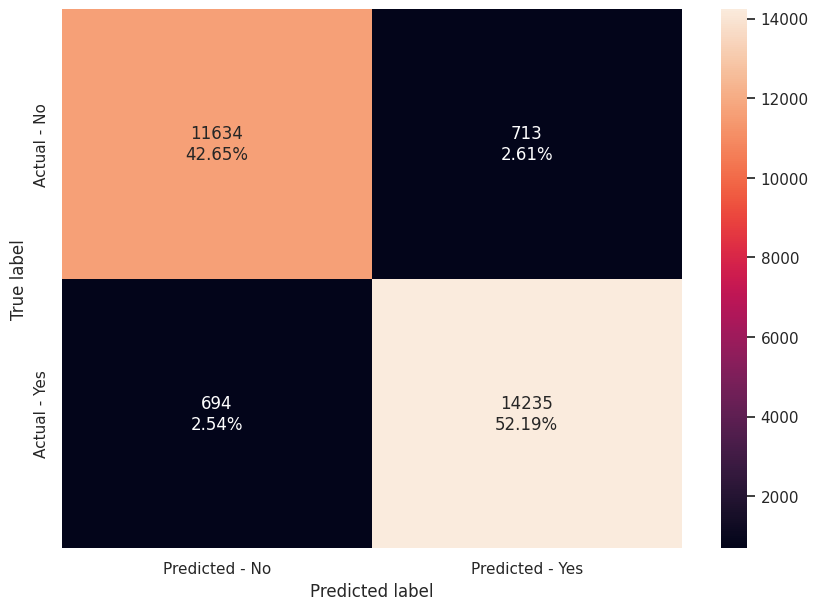

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

- The model is overfitting the training data as training recall/precision is much higher than the test recall/precision

### Cost Complexity Pruning

**Let's try pruning the tree and see if the performance improves.**

In [ ]:
path = d_tree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs_list = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs_list.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs_list[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.17918668897406498


In [ ]:
#Fitting model for each value of alpha and saving the train recall in a list
recall_train=[]
for clf in clfs_list:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    recall_train.append(values_train)

In [ ]:
#Fitting model for each value of alpha and saving the test recall in a list
recall_test=[]
for clf in clfs_list:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    recall_test.append(values_test)

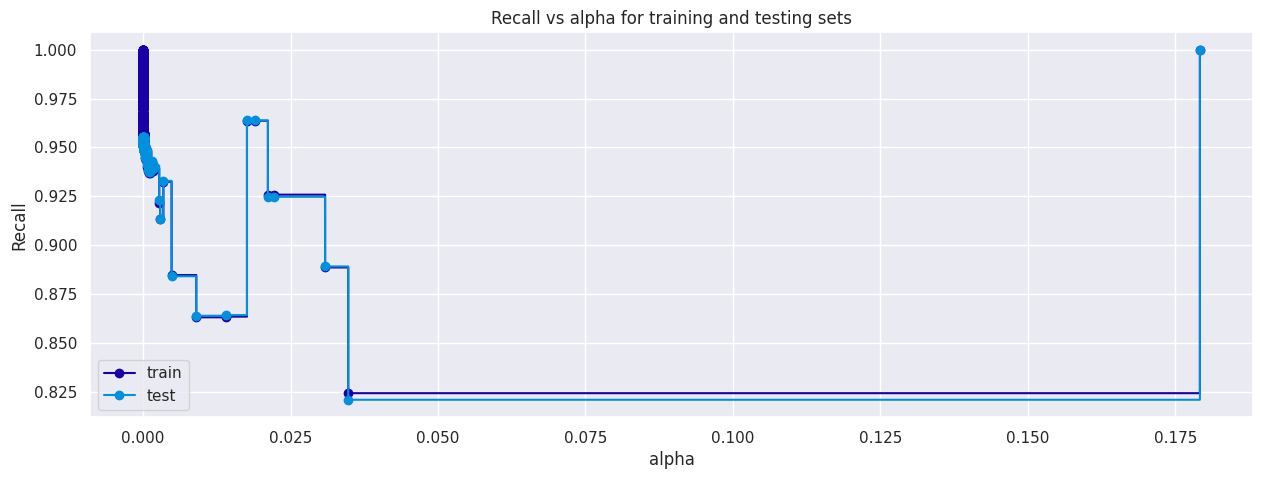

In [ ]:
#Plotting the graph for Recall VS alpha
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Accuracy on training set :  0.5473201238195503
Accuracy on test set :  0.5473309869482329
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.5473201238195503
Precision on test set :  0.5473309869482329


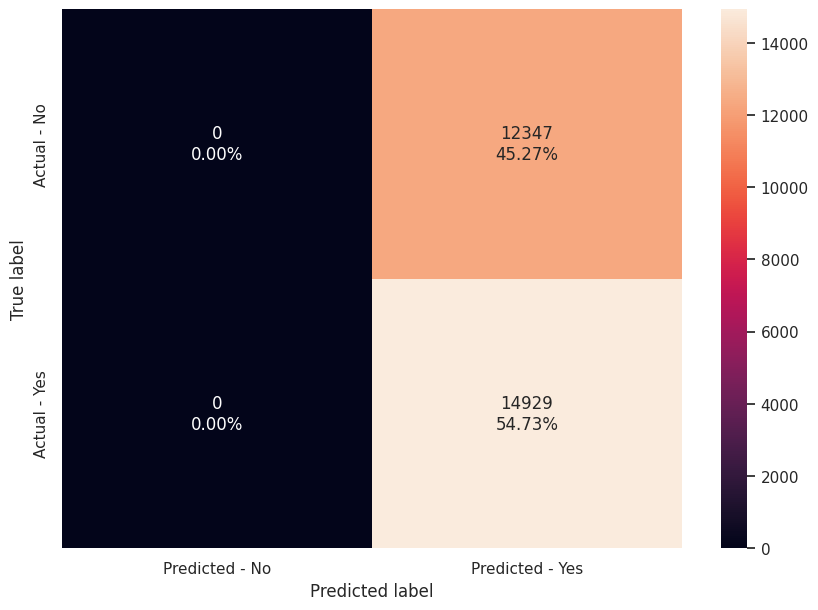

In [ ]:
#Creating the model where we get highest test recall
index_best_pruned_model = np.argmax(recall_test)

pruned_dtree_model = clfs_list[index_best_pruned_model]

get_metrics_score(pruned_dtree_model)

make_confusion_matrix(pruned_dtree_model,y_test)

- We can see from the graph plotted above that maximum test recall is for the model without pruning i.e. alpha=0
- There is no improvement in the model performance as the best pruned model fitted is the same as we built initially.
- Let's try hyperparameter tuning, with class weights to compensate for the imbalanced data, and see if the model performance improves.

### Hyperparameter Tuning

In [ ]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.453,1:0.547},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.453, 1: 0.547}, max_depth=4,
                       max_leaf_nodes=5, min_impurity_decrease=0.0001,
                       random_state=1)

Accuracy on training set :  0.8606715796420547
Accuracy on test set :  0.8625164980202376
Recall on training set :  0.9636541111621497
Recall on test set :  0.9638287896041262
Precision on training set :  0.8153618189326403
Precision on test set :  0.8176032729132338


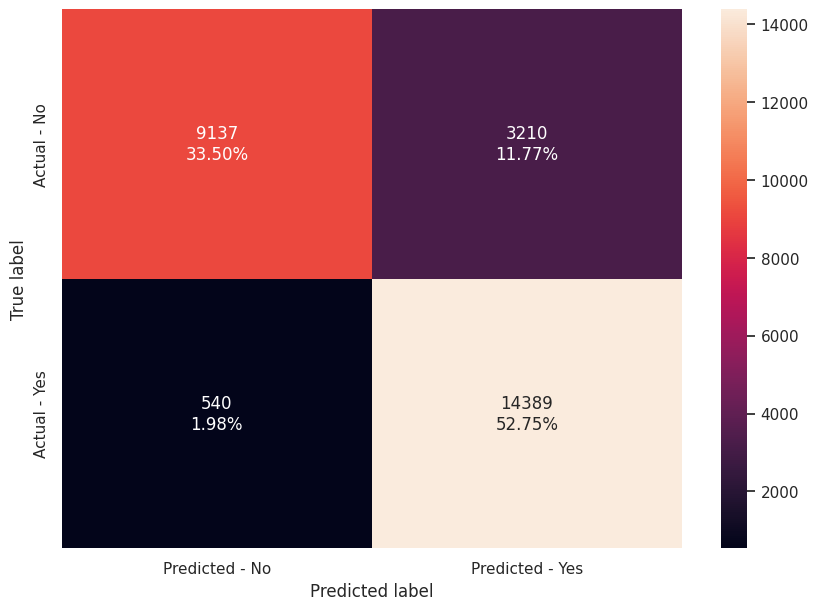

In [ ]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

- The model is not generalizing well and overfits the training/test recall
- Recall values are too high compared to accuracy and precision

## Random Forest Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.9630810969350344
Recall on training set :  1.0
Recall on test set :  0.9557907428494876
Precision on training set :  1.0
Precision on test set :  0.9762588943623426


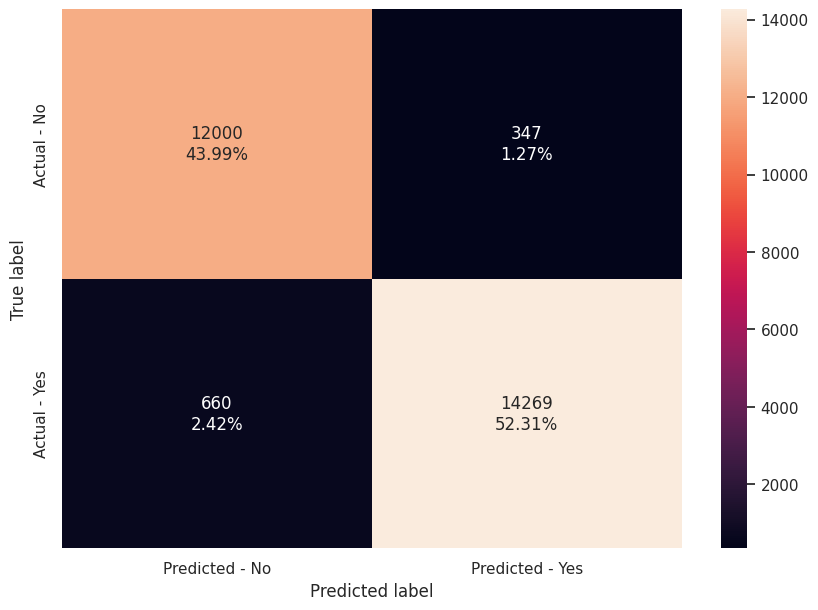

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

- With default parameters, random forest is performing better than decision tree in terms of precision, accuracy and, recall
- The model is overfitting the training data
- We'll try to reduce overfitting and improve recall by hyperparameter tuning

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight={0:0.453,1:0.547},random_state=1,oob_score=True,bootstrap=True)

parameters = {
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.453, 1: 0.547}, max_features=None,
                       min_samples_split=17, n_estimators=80, oob_score=True,
                       random_state=1)

Accuracy on training set :  0.9842868591002656
Accuracy on test set :  0.9638143422789265
Recall on training set :  0.9817696371152963
Recall on test set :  0.9589389778283877
Precision on training set :  0.9894392685608472
Precision on test set :  0.9745405037440436


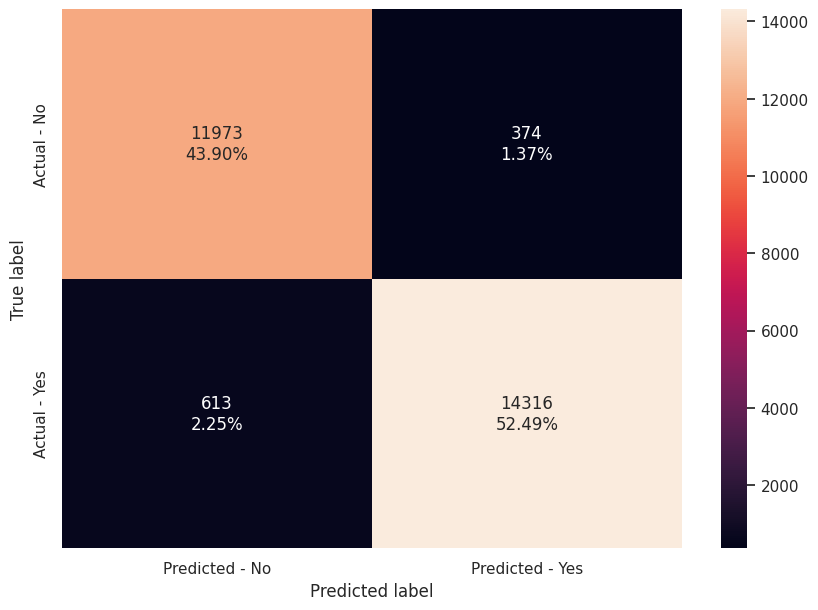

In [ ]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

- The model with hyperparameter tuning is generalizing well and is not overfitting the training/test recall
- The overfitting has reduced after tuning the model
- Recall are is not too high compared to accuracy and precision
- The model is good at forecasting customer satisfaction

## Bagging Classifier

Accuracy on training set :  0.9970459295108499
Accuracy on test set :  0.9608446986361636
Recall on training set :  0.995262976573266
Recall on test set :  0.9508339473507937
Precision on training set :  0.9993369847218219
Precision on test set :  0.9770114942528736


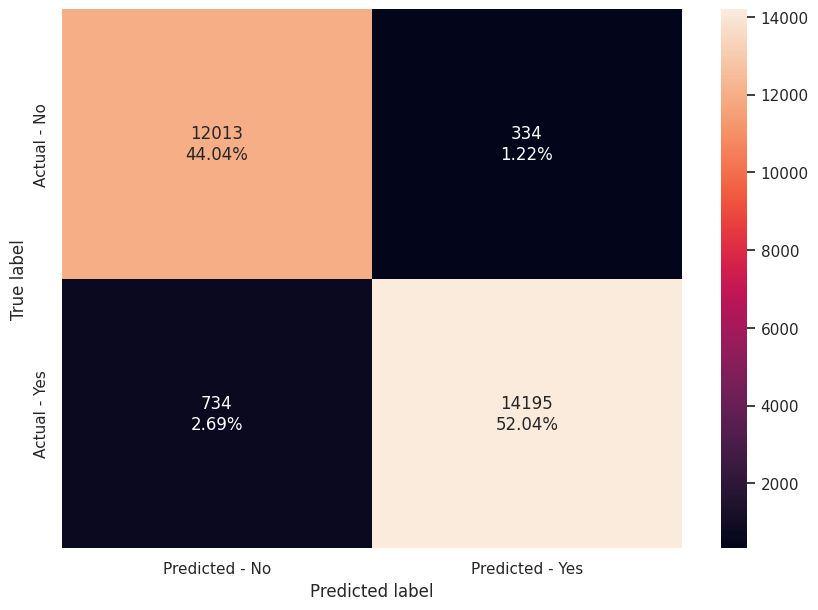

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

- With default parameters, bagging classifier is generalizing well
- The model default model has less recall than the Random Forest with hyperparameter tuning
- We'll try improve recall by hyperparameter tuning

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50,
                  random_state=1)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50,
                  random_state=1)

Accuracy on training set :  0.9997957291683035
Accuracy on test set :  0.9654641443026837
Recall on training set :  0.9996267799724391
Recall on test set :  0.9567954986938174
Accuracy on training set :  0.9997957291683035
Accuracy on test set :  0.9654641443026837
Recall on training set :  0.9996267799724391
Recall on test set :  0.9567954986938174
Precision on training set :  1.0
Precision on test set :  0.9796310266785543
Precision on training set :  1.0
Precision on test set :  0.9796310266785543


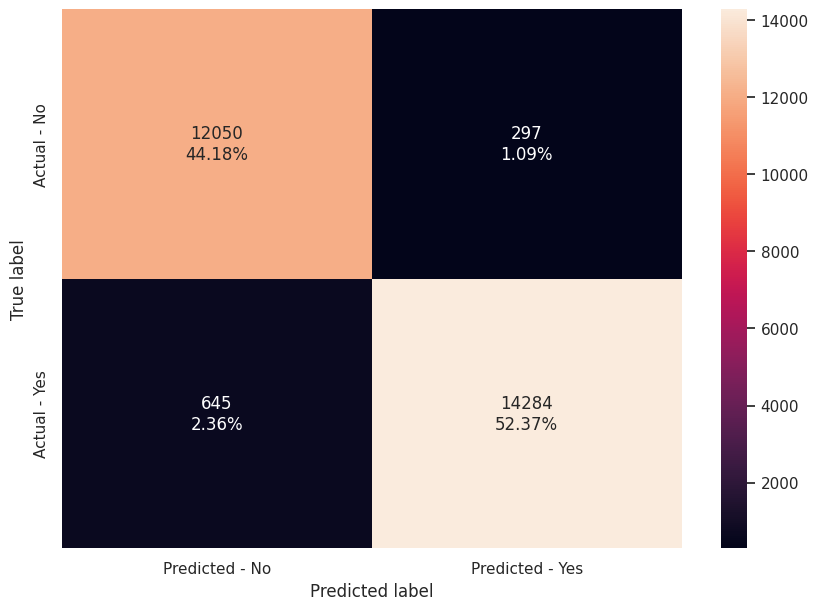

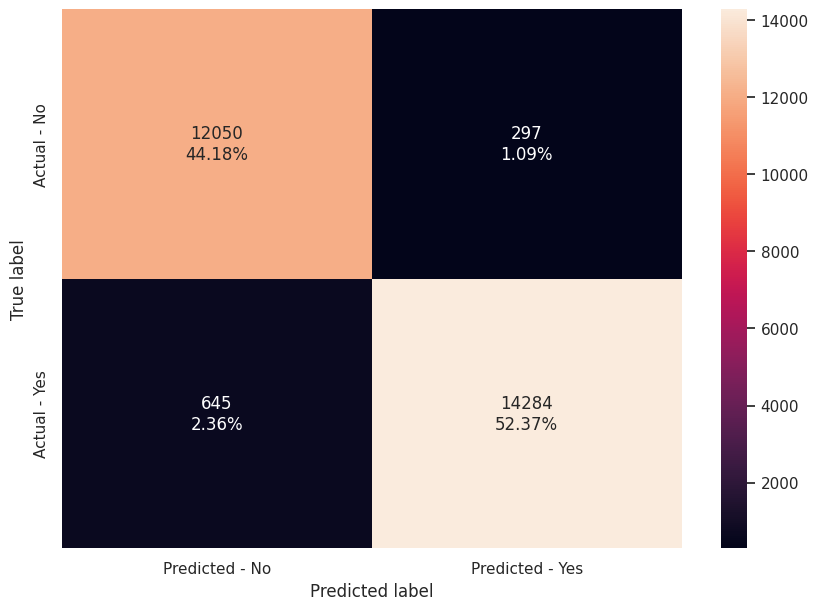

In [ ]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

- The model with hyperparameter tuning is generalizing well and is not overfitting the training/test recall
- The Bagging Classifier with hyperparameter tuning has a lower recall compared to  the Random Forest with hyperparameter tuning
- The model is good at forecasting customer satisfaction

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">Boosting Models & Hyperparameter Tuning

## AdaBoost Classifier

Accuracy on training set :  0.9128549205700728
Accuracy on test set :  0.9123771814048981
Recall on training set :  0.91421681212678
Recall on test set :  0.9135240136646795
Precision on training set :  0.9256438579152375
Precision on test set :  0.9254257990092963
Accuracy on training set :  0.9128549205700728
Accuracy on test set :  0.9123771814048981
Recall on training set :  0.91421681212678
Recall on test set :  0.9135240136646795
Precision on training set :  0.9256438579152375
Precision on test set :  0.9254257990092963


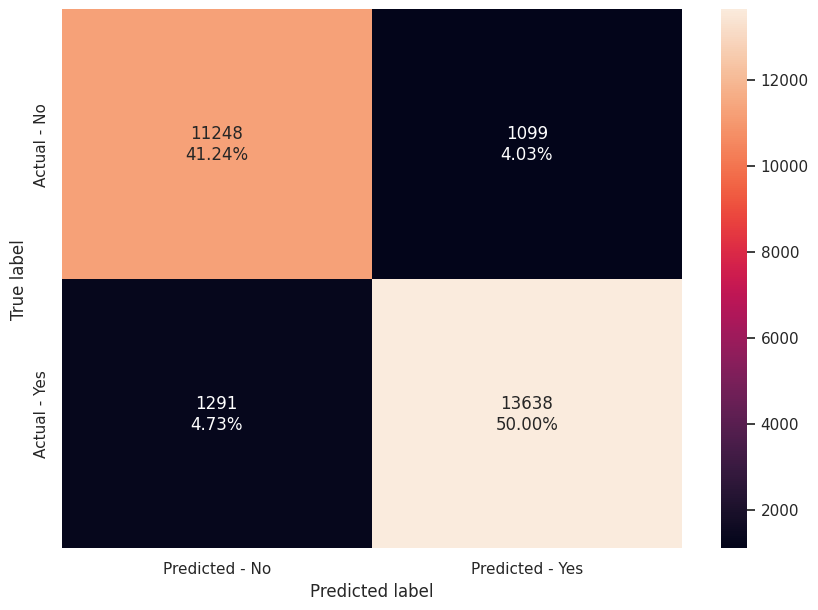

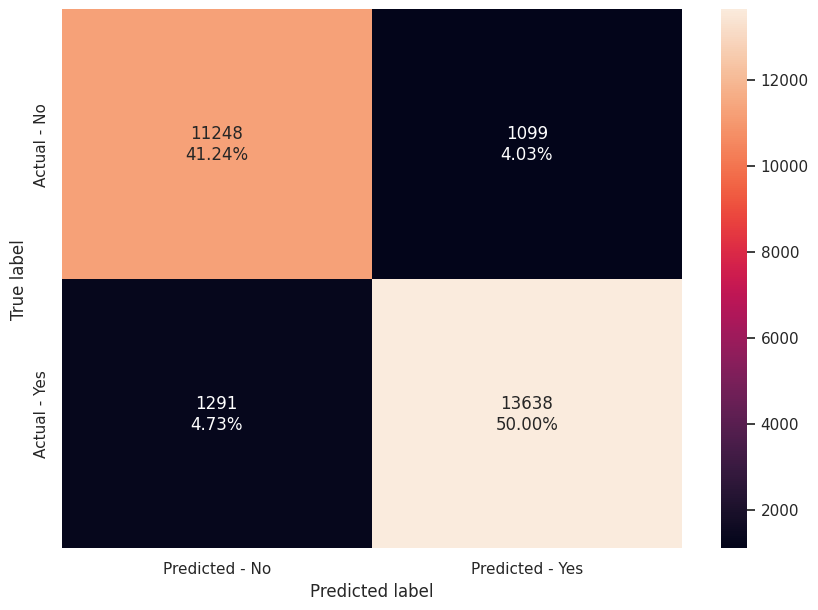

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

- The model is generalizing well but is giving a lower recall (test data) compared to the Bagging classifier with hyperparameter tuning
- We will try to enhance the recall value applying the hyperparameter tuning to Adaboost

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.4000000000000001, n_estimators=80,
                   random_state=1)

Accuracy on training set :  0.9667195675743624
Accuracy on test set :  0.9589382607420442
Recall on training set :  0.9627354157096922
Recall on test set :  0.955857726572443
Precision on training set :  0.9761308726785818
Precision on test set :  0.9687054510895391


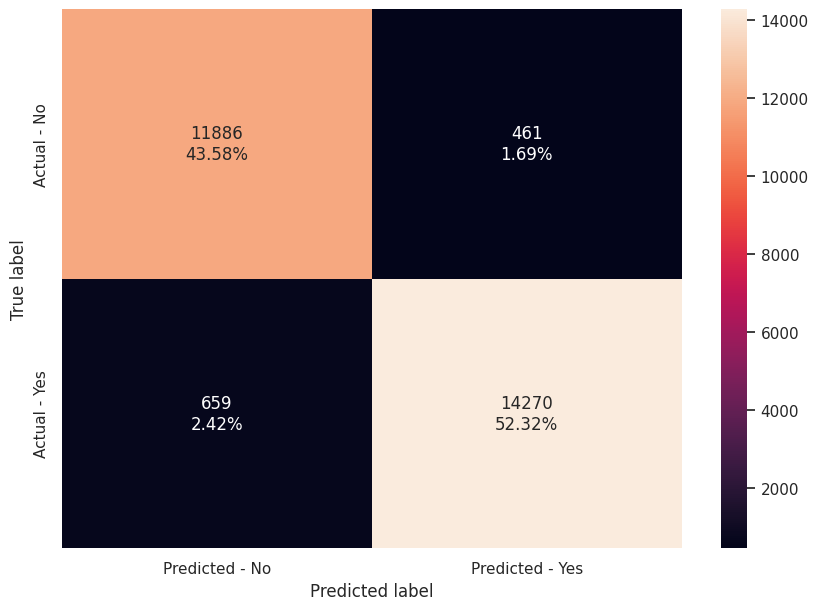

In [ ]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

- The Adaboost with hyperparameter tuning recall value improved but still lower compared to the Random Forest recall

## Gradient Boosting Classifier

Accuracy on training set :  0.9421599283480775
Accuracy on test set :  0.9436134330547001
Recall on training set :  0.9425528249885163
Recall on test set :  0.9438676401634403
Precision on training set :  0.9513198690272666
Precision on test set :  0.9526739233317558


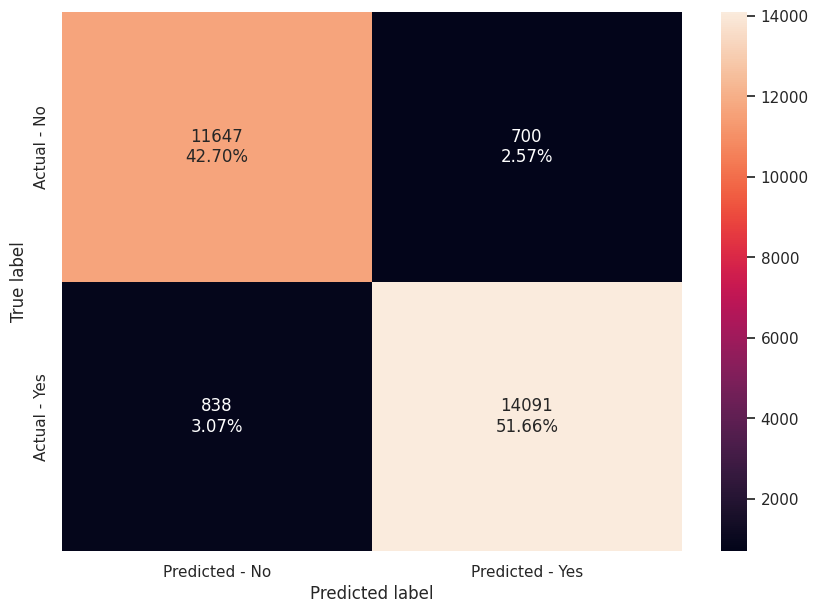

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

- The model is not overfitting the data but is giving A relatively low recall compared to other models
- The recall is better as compared to AdaBoost but still not great

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.8)

Accuracy on training set :  0.9569302807938279
Accuracy on test set :  0.9557853057633084
Recall on training set :  0.9503330271015158
Recall on test set :  0.9506999799048831
Precision on training set :  0.9703632046433911
Precision on test set :  0.9679465320875673


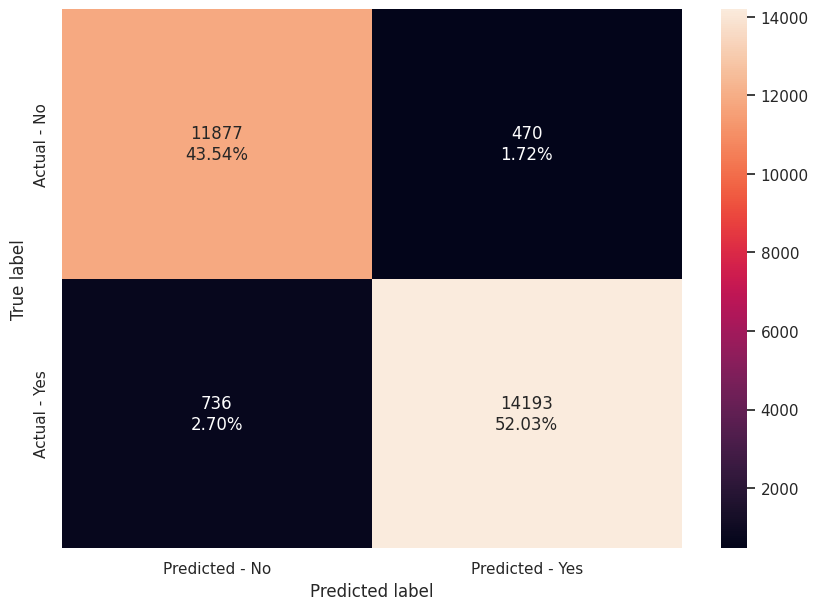

In [ ]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

- The model performance has not improved by much after hyperparameter tuning.

## XGBoost Classifier

Accuracy on training set :  0.9811285177794189
Accuracy on test set :  0.9660140783106027
Recall on training set :  0.9732717041800643
Recall on test set :  0.9578002545381472
Precision on training set :  0.9920985631090691
Precision on test set :  0.9796519594409427


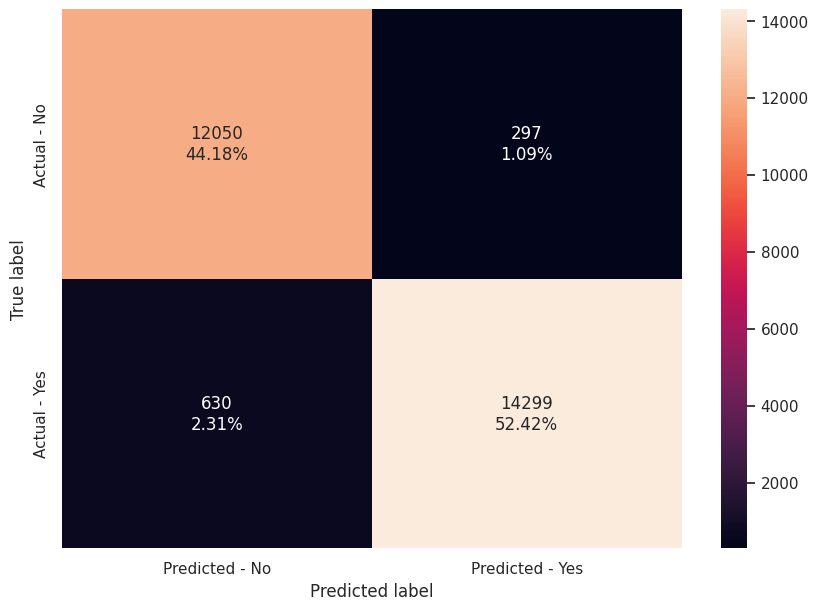

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

- The default model is not overfitting the data but is giving equivalent results compared to other models

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

- The model performance has improved after hyperparameter tuning and it is the best performance reached
- Let's try one more model - Stacking classifier.

## Stacking Classifier

- Stacking classifier stacks the output of individual estimators and use a classifier to compute the final prediction
- Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator

In [ ]:
estimators = [('Random Forest',rf_tuned), ('XGBoost Classifier',xgb_classifier), ('AdaBoost Classifier',abc_tuned)]

final_estimator = dtree_estimator

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

In [ ]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

- Stacking classifier has further increased the recall that we got from xgboost model and increased the precision as well
- Model is slightly overfitting the training data

## Comparing all models

In [ ]:
# defining list of models
models = [d_tree, pruned_dtree_model, dtree_estimator,rf_estimator, rf_tuned, bagging_classifier,bagging_estimator_tuned,
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

NameError: name 'd_tree' is not defined

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Decision Tree Pruned','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

#### Observations
- The Tuned XGBoost Classifier is giving the highest Recall on test data, and it is not overfitting (98.97%)
- The Tuned XGBoost Classifier model is decreasing the number of false negatives and increased the number of false positives
- Decision Tree Pruned and Tuned show a higher Test/Train Recall, but the models are overfitting the train data. For this reason, we decided to ignore these models

In [ ]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = stacking_classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


- El área bajo la curva (AUC) es 0,98
- La métrica de Recall en train data es 0.0.989837 y en test data es 0.989685
- Stacking classifier funcionó bastante bien para predecir la satisfacción de los pasajeros, sin embargo, adicionalmente se está considerando el tiempo de ejecución para elegir al mejor modelo.

In [ ]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Inflight_Entertainment es la característica más importante, seguida de Seat_Comfort, según el modelo de DecisionTree-Hyperparameter

# Interpretación del mejor modelo

Se ha elegido al mejor modelo basándose en la métrica de Recall, ya que lo que necesita la empresa es reducir el error tipo II y esta métrica está relacionada a cumplir este objetivo para hacer una buena predicción. Al priorizar los resultados de esta métrica se observa en primer lugar con valor de 1 al modelo de XGBoost-Hyperparameter, sin embargo se descarta por mostrar Overfitting (presenta ruido), de igual manera se descartan los modelos que presentan sobreajuste en las métricas de Accuracy y Precision como los modelos: Decision Tree Classifier, Bagging Classifier, Random Forest Classifier, AdaBoost Classifier, Bagging Classifier-Hyperparameter y XGBoost Classifier-Hyperparameter.
Descartando todos esos modelos el mejor modelo con mayor Test_Recall es el Decision Tree Classifier-Hyperparameter teniendo un valor de 0.9638, tal cual como se indicó al comienzo se está considerando la métrica de recall y si bien es cierto en las demás métricas los valores son inferiores a los demás modelos implica que hubo un trade off  para llegar a la mejor combinación de recall.
Cabe destacar que el modelo de Stacking Classifier presentó un mejor resultado en la métrica de recall, sin embargo no se consideró dado que se evaluó el tiempo de ejecución y para utilizar este modelo era necesario considerar los mejores modelos como estimadores por lo que el tiempo de ejecución es mayor que el Decision Tree Classifier-Hyperparameter, además la diferencia de resultados es mínima en el test recall.

# Business Insights

Tomando en cuenta los resultados obtenidos del modelo "Tuned Decision Tree" observamos que las variables con mayor relevancia en la satisfacción del cliente son el entretenimiendo a bordo y la comodidad del asiento, teniendo una gran relevancia el entretenimiento, los cuales los obtuvimos gracias al análisis del future importances.

Conociendo que el pasajero basa su satisfacción con lo brindado durante el trayecto del viaje, recomendamos mejorar todo lo relacionado al equipamiento del avión sabiendo que es uno de los factores determinantes.


# Recomendaciones

Conociendo que Flight Entertainment y Seat Confort son las variables más importantes al determinar la satisfacción del cliente, las estrategias desarrolladas a continuación se basan en las mismas:

1. Para mejora del entretenimiento a bordo se debe de priorizar la inversión en la oferta de entretenimiento. Para lo cual sugerimos más y mejores opciones de contenido personalizado en base a la información obtenida al momento de registro del cliente (sexo, edad, destino, fechas festivas, etc), ofrecer pantallas de alta calidad y de mayor tamaño, interface del software mas amigable lo cual nos traería una mejora en la satisfacción del cliente y por lo tanto su lealtad.

2. Seat Confort: Sugerimos que para los viajes a larga distancia se destinen aviones con una mayor calidad, amplitud e inclinación en los asientos, lo cual nos traería una menor cantidad de quejas y una mayor satisfacción en general. Mientras que para los viajes cortos sugerimos reducir los costos tomando en cuenta los mismos factores, implicando una reducción en la tarifa.

# Conclusiones

## Relevancia

Las variables de entretenimiento en el vuelo y comodidad del asiento son críticos para tener un resultado positivo en la satisfacción del cliente.  

Realizar inversión en estos dos factores claves generará un impacto positivo a nivel de lealtad: retención de clientes, lo que significaría ahorro respecto al costo de adquisición de nuevos clientes y next selling.

Fallar en estos aspectos provocaría tener una alta probabilidad de fuga de clientes

## Implementación

Factibilidad técnica: Debido a que el proceso de equipamiento de los aviones representaría costos significativos sugerimos hacer la implementación por fases empezando por las rutas más largas o rentables para la empresa. Respecto a los viajes cortos la estrategia es poder optimizar en los costos lo que también implicaría bajar las tarifas así mejoraríamos nuestra competitividad dentro del mercado.

Para el proceso de personalización del entretenimiento  en el vuelo será necesario adaptar el flujo del proceso y del sistema para hacer factible el registro, almacenamiento y procesamiento de los datos  del cliente (Edad, género, grado de instrucción, ocupación, nacionalidad, idioma, etc).

La inversión de estos factores no solo representaría una mejora en la satisfacción del cliente, adicional a ello se tendría un impacto directo en la rentabilidad ya que parte de la estrategia comercial va relacionada a incrementar las tarifas  en rutas largas.